Jeff Dunagin

DSC 530

Excercise 7.2

30 Jan 2022

# 7.1
Using data from the NSFG, make a scatter plot of birth weight
versus mother's age. Plot percentiles of birth weight versus mother's age.
Compute Pearson's and Spearman's correlations. How would you characterize the relationship between these variables?

In [18]:
import first
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# get the data
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb']) # not sure what this does

In [19]:
# ages and weights
ages = live['agepreg']
weights = live['totalwgt_lb']

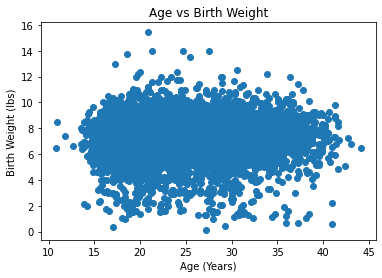

In [20]:
# scatter plot
plt.scatter(ages, weights)
plt.xlabel('Age (Years)')
plt.ylabel('Birth Weight (lbs)')
plt.title('Age vs Birth Weight')
plt.show()

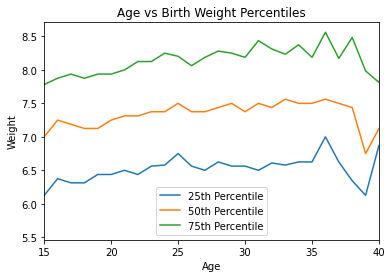

In [21]:
# compute percentiles for each age
min_age = int(min(ages))
max_age = int(max(ages))

weight_dict = {}
for i in range(min_age, max_age+1):
    weight_dict[i] = []

for a,w in zip(ages, weights):
    age = int(a)
    weight_dict[age].append(w)

for a in weight_dict:
    weight_dict[a] = np.array(weight_dict[a])
    weight_dict[a] = [np.percentile(weight_dict[a], 25), np.percentile(weight_dict[a], 50),
                      np.percentile(weight_dict[a], 75)]

int_ages = []
p_25 = []
p_50 = []
p_75 = []

for a in weight_dict:
    int_ages.append(a)
    p_25.append(weight_dict[a][0])
    p_50.append(weight_dict[a][1])
    p_75.append(weight_dict[a][2])    

# plot
plt.plot(int_ages, p_25, label='25th Percentile')
plt.plot(int_ages, p_50, label='50th Percentile')
plt.plot(int_ages, p_75, label='75th Percentile')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.xlim(15,40) # due to low amount of data for the extremes
plt.title('Age vs Birth Weight Percentiles')
plt.legend()
plt.show()

In [22]:
# pearson and spearman r
pearsonr = scipy.stats.pearsonr(ages,weights)
spearmanr = scipy.stats.spearmanr(ages,weights)

print('Pearson r {}, p-value {}'.format(pearsonr[0], pearsonr[1]))
print('Spearman r {}, p-value {}'.format(spearmanr[0], spearmanr[1]))             

Pearson r 0.06883397035410893, p-value 5.722947107225657e-11
Spearman r 0.09461004109658226, p-value 1.9975811921504994e-19


There are very small correlation coeficients here. This is a very weak positive correlation. 

# 8.1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.


In [23]:
# set parameters for our distribution
mu = 0
sigma = 1

means = []
medians = []

iters = 10000
n = 10

for _ in range(iters):
    xs = [np.random.normal(mu, sigma) for i in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median) 

In [24]:
# get mean error
means = np.array(means)
means -= mu
print('Mean Error xbar {}'.format(np.mean(means)))

medians = np.array(medians)
medians -= mu
print('Mean Error median {}'.format(np.mean(medians)))

Mean Error xbar -0.00015743602249477284
Mean Error median 0.001684836057794763


Both methods are very small, appear to be unbiased.

In [25]:
# similar set up for S^2 and the other
mu = 0
sigma = 1

s2 = []
s2n1 = []

iters = 10000
n = 10

for _ in range(iters):
    xs = [np.random.normal(mu, sigma) for i in range(n)]
    var = np.var(xs)
    varn1 = np.var(xs, ddof=1)
    s2.append(var)
    s2n1.append(varn1) 

In [26]:
# get MSE
s2 = np.array(s2)
s2 -= sigma
print('MSE for s2: {}'.format(np.mean(s2**2)))

s2n1 = np.array(s2n1)
s2n1 -= sigma
print('MSE for s2n-1: {}'.format(np.mean(s2n1**2)))

MSE for s2: 0.19159742642354166
MSE for s2n-1: 0.2246504197765904


The sample variance yields a smaller MSE than the other method.

# 8.2
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.


In [27]:
# set up parameters
lam = 2
n = 10
iters = 1000

Ls = []

for _ in range(iters):
    xs = [np.random.exponential(1/lam) for i in range(n)]
    L = 1 / np.mean(xs)
    Ls.append(L)
    

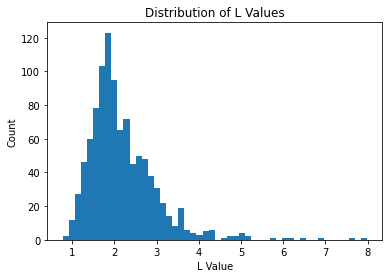

RMSE: 0.8307330385305595
90 Percent Confidence Interval: 1.2494343773830283 - 3.59019027146982


In [32]:
# get RMSE
Ls = np.array(Ls)
LDiff = Ls - lam
LDiff2 = LDiff**2
RMSE = np.sqrt(np.mean(LDiff2))

# 90 percent confidence
fivep = np.percentile(Ls, 5)
nintyfivep = np.percentile(Ls, 95)

# plot the distribution
plt.hist(Ls, bins = 50)
plt.xlabel('L Value')
plt.ylabel('Count')
plt.title('Distribution of L Values')
plt.show()
print('RMSE: {}'.format(RMSE))
print('90 Percent Confidence Interval: {} - {}'.format(fivep, nintyfivep))

In [29]:
# function time
def lambda_error(n):
    lam = 2
    iters = 1000

    Ls = []

    for _ in range(iters):
        xs = [np.random.exponential(1/lam) for i in range(n)]
        L = 1 / np.mean(xs)
        Ls.append(L)
        
    Ls = np.array(Ls)
    LDiff = Ls - lam
    LDiff2 = LDiff**2
    RMSE = np.sqrt(np.mean(LDiff2))
    
    return RMSE

In [30]:
# n ranging from 4 to 20 (blaze it)
ns = range(4,21)
errors = [lambda_error(n) for n in ns]

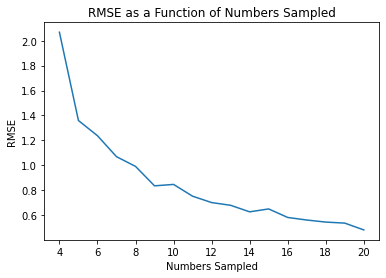

In [31]:
plt.plot(ns, errors)
plt.xlabel('Numbers Sampled')
plt.ylabel('RMSE')
plt.title('RMSE as a Function of Numbers Sampled')
plt.show()

The standard error decreases as a function of numbers pulled from the exponential distribution...not surprising.